In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")
import gc
from datetime import datetime
import time
import sklearn
import scipy
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit, learning_curve
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
import time
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
np.random.seed(42)
import plotly
from datetime import datetime, timedelta
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
#initiate visualization library for jupyter notebook 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyoff.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
#defining visualizaition functions
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)
        
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()
    
    
def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()

def categorical_plot(cols_cat, axs, df):
    
    idx_row = 0
    for col in cols_cat:
        # Returning column index
        idx_col = cols_cat.index(col)

        # Verifying brake line in figure (second row)
        if idx_col >= 3:
            idx_col -= 3
            idx_row = 1

        # Plot params
        names = df[col].value_counts().index
        heights = df[col].value_counts().values

        # Bar chart
        axs[idx_row, idx_col].bar(names, heights, color='navy')
        if (idx_row, idx_col) == (0, 2):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=30)
        if (idx_row, idx_col) == (1, 1):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=90)

        total = df[col].value_counts().sum()
        axs[idx_row, idx_col].patch.set_facecolor('#FFFFFF')
        format_spines(axs[idx_row, idx_col], right_border=False)
        for p in axs[idx_row, idx_col].patches:
            w, h = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axs[idx_row, idx_col].annotate('{:.1%}'.format(h/1000), (p.get_x()+.29*w,
                                            p.get_y()+h+20), color='k')

        # Plot configuration
        axs[idx_row, idx_col].set_title(col, size=12)
        axs[idx_row, idx_col].set_ylim(0, heights.max()+120)
        

def individual_cat_pie_plot(col, ax, cs, df):
    
    # Creating figure and showing data
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    #if cs:
    #cs = cm.viridis(np.arange(len(names))/len(names))
    explode = np.zeros(len(names))
    explode[0] = 0.05
    wedges, texts, autotexts = ax.pie(heights, labels=names, explode=explode,
                                       startangle=90, shadow=False, 
                                      autopct='%1.1f%%', colors=cs[:len(names)])
    plt.setp(autotexts, size=12, color='w')
    

def donut_plot(col, ax, df, text='', colors=['navy', 'crimson', 'green', 'red', 'cyan'], labels=['good', 'bad', 'fair', 'bald', 'none']):
    
    sizes = df[col].value_counts().values
    #labels = df[col].value_counts().index
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie((sizes[0], sizes[1], sizes[2], sizes[3], sizes[4]), labels=labels, colors=colors, autopct='%1.1f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    
def categorical_plot(cols_cat, axs, df):
    
    idx_row = 0
    for col in cols_cat:
        # Returning column index
        idx_col = cols_cat.index(col)

        # Verifying brake line in figure (second row)
        if idx_col >= 3:
            idx_col -= 3
            idx_row = 1

        # Plot params
        names = df[col].value_counts().index
        heights = df[col].value_counts().values

        # Bar chart
        axs[idx_row, idx_col].bar(names, heights, color='navy')
        if (idx_row, idx_col) == (0, 2):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=30)
        if (idx_row, idx_col) == (1, 1):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=90)

        total = df[col].value_counts().sum()
        axs[idx_row, idx_col].patch.set_facecolor('#FFFFFF')
        format_spines(axs[idx_row, idx_col], right_border=False)
        for p in axs[idx_row, idx_col].patches:
            w, h = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axs[idx_row, idx_col].annotate('{:.1%}'.format(h/1000), (p.get_x()+.29*w,
                                            p.get_y()+h+20), color='k')

        # Plot configuration
        axs[idx_row, idx_col].set_title(col, size=12)
        axs[idx_row, idx_col].set_ylim(0, heights.max()+120)
        

def individual_cat_pie_plot(col, ax, cs, df):
    
    # Creating figure and showing data
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    #if cs:
    #cs = cm.viridis(np.arange(len(names))/len(names))
    explode = np.zeros(len(names))
    explode[0] = 0.05
    wedges, texts, autotexts = ax.pie(heights, labels=names, explode=explode,
                                       startangle=90, shadow=False, 
                                      autopct='%1.1f%%', colors=cs[:len(names)])
    plt.setp(autotexts, size=12, color='w')
    

def donut_plot(col, ax, df, text='', colors=['navy', 'crimson'], labels=['good', 'bad']):
    
    sizes = df[col].value_counts().values
    #labels = df[col].value_counts().index
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie((sizes[0], sizes[1]), labels=labels, colors=colors, autopct='%1.1f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)

def add_series_working_days(series_name, df, date_col1, date_col2):
    
    # Creating a list with the difference between dates
    time_list = []
    idx = 0
    second_date_series = df[date_col2].values.astype('datetime64[D]')
    for date in df[date_col1].values.astype('datetime64[D]'):
        second_date = second_date_series[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adding column in a DataFrame object
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

In [3]:
# loading data 
customers_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_customers_dataset.csv")
geolocation_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_geolocation_dataset.csv")
order_items_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_order_items_dataset.csv")
order_payments_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_order_payments_dataset.csv")
order_reviews_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_order_reviews_dataset.csv")
orders_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_orders_dataset.csv")
products_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_products_dataset.csv")
sellers_ = pd.read_csv("Desktop/DS ToolKit/DataSet/olist_sellers_dataset.csv")
category_name_translation_ = pd.read_csv("Desktop/DS ToolKit/DataSet/product_category_name_translation.csv")

In [4]:
# displaying data shape
#dataset = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_name_translation]
dataset = {
    'Customers': customers_,
    'Geolocation': geolocation_,
    'Order Items': order_items_,
    'Payments': order_payments_,
    'Reviews': order_reviews_,
    'Orders': orders_,
    'Products': products_,
    'Sellers': sellers_,
    'Translations': category_name_translation_
}

for x, y in dataset.items():
    print(f'{x}', (list(y.shape)))

Customers [99441, 5]
Geolocation [1000163, 5]
Order Items [112650, 7]
Payments [103886, 5]
Reviews [100000, 7]
Orders [99441, 8]
Products [32951, 9]
Sellers [3095, 4]
Translations [71, 2]


In [5]:
# displaying dataset column names
for x, y in dataset.items():
    print(f'{x}', f'{list(y.columns)}\n', (list(y.shape))

Customers ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Order Items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Orders ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Products ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'produ

In [6]:
# checking for null values in datasets
for x, y in dataset.items():
    print(f'{x}: {y.isnull().any().any()}')

Customers: False
Geolocation: False
Order Items: False
Payments: False
Reviews: True
Orders: True
Products: True
Sellers: False
Translations: False


In [7]:
# taking count for dataset with missing values
for x, y in dataset.items():
    if y.isnull().any().any():
        print(f'{x}', (list(y.shape)),'\n')
        print(f'{y.isnull().sum()}\n')

Reviews [100000, 7] 

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Orders [99441, 8] 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Products [32951, 9] 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



Although relating to the same transactions, the individual datasets holds different properties of an order, i would require methods like join and concat on unique keys to create a master dataset for analysis purpose.

In [8]:
# creating master dataframe 
order_payments_.head()
print(order_payments_.shape)
df1 = order_payments_.merge(order_items_, on='order_id')
print(df1.shape)
df2 = df1.merge(products_, on='product_id')
print(df2.shape)
df3 = df2.merge(sellers_, on='seller_id')
print(df3.shape)
df4 = df3.merge(order_reviews_, on='order_id')
print(df4.shape)
df5 = df4.merge(orders_, on='order_id')
print(df5.shape)
df6 = df5.merge(category_name_translation_, on='product_category_name')
print(df6.shape)
df = df6.merge(customers_, on='customer_id')
print(df.shape)

(103886, 5)
(117601, 11)
(117601, 19)
(117601, 22)
(118315, 28)
(118315, 35)
(116581, 36)
(116581, 40)


In [9]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [10]:
# cleaning up name columns
df['customer_city'] = df['customer_city'].str.title()
df['seller_city'] = df['seller_city'].str.title()
df['product_category_name_english'] = df['product_category_name_english'].str.title()
df['payment_type'] = df['payment_type'].str.replace('_', ' ').str.title()
df['product_category_name_english'] = df['product_category_name_english'].str.replace('_', ' ')
# engineering new/essential columns
df['review_response_time'] = (df['review_answer_timestamp'] - df['review_creation_date']).dt.days
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['product_size_cm'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [11]:
# dropping non-needed columns
df = df.drop(["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_length_cm", "product_height_cm", "product_width_cm", "product_length_cm", "review_id","review_comment_title", "review_comment_message", "product_category_name"], axis=1)

In [12]:
# displaying summary staticstics of columns
df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_weight_g,seller_zip_code_prefix,seller_city,seller_state,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_response_time,delivery_against_estimated,product_size_cm,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
count,116581,116581.000000,116581,116581.000000,116581.000000,116581.000000,116581,116581,116581,116581.000000,116581.000000,116580.000000,116581.000000,116581,116581,116581.000000,116581,116581,116581,116581,116581,116567,115368,114066,116581,116581,116581,116581.000000,116581,116581,116581.000000,114066.000000,116580.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581,116581
unique,97255,NaN,4,NaN,NaN,NaN,32328,3033,92052,NaN,NaN,NaN,NaN,604,23,NaN,633,96897,97255,7,96720,88963,79801,94336,449,71,94087,NaN,4095,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,12
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,Credit Card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,NaN,Sao Paulo,SP,NaN,2017-12-19 00:00:00,2017-08-17 22:17:55,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,Bed Bath Table,9a736b248f67d166d2fbb006bcb877c3,NaN,Sao Paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mon,Aug
freq,63,NaN,86012,NaN,NaN,NaN,536,2155,63,NaN,NaN,NaN,NaN,29056,83121,NaN,535,63,63,114067,63,63,63,63,653,11990,75,NaN,18412,49133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18965,12569
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-15 00:00:00,2016-10-16 03:20:17,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.093369,NaN,2.949614,172.910258,1.196953,NaN,NaN,NaN,120.751369,20.062550,2115.560422,24504.889030,NaN,NaN,4.017507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35053.391556,NaN,NaN,2.581458,11.057423,15413.914359,2017.538776,6.032252,2.746082,14.763615,NaN,NaN
std,NaN,0.727240,NaN,2.783798,267.622516,0.701350,NaN,NaN,NaN,183.848421,15.845515,3783.587898,27625.157426,NaN,NaN,1.397886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29817.864821,NaN,NaN,9.759302,10.158759,23667.280574,0.505129,3.225303,1.961098,5.325197,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000,0.000000,1001.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,0.000000,-189.000000,168.000000,2016.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,61.000000,1.000000,NaN,NaN,NaN,39.900000,13.080000,300.000000,6429.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,1.000000,6.000000,2873.000000,2017.000000,3.000000,1.000000,11.000000,NaN,NaN


In [13]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

,delivery_against_estimated,order_delivered_customer_date,order_delivered_carrier_date,order_approved_at,product_size_cm,product_weight_g,order_purchase_mon,price,seller_state,seller_city,seller_zip_code_prefix,freight_value,shipping_limit_date,review_creation_date,seller_id,product_id,order_item_id,payment_value,payment_installments,payment_type,payment_sequential,review_score,order_status,review_answer_timestamp,customer_id,order_purchase_day,order_purchase_timestamp,order_estimated_delivery_date,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_id
Values,2515.000000,2515.000000,1213.000000,14.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,2.157298,2.157298,1.040478,0.012009,0.000858,0.000858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

In [15]:
# displaying dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 116579
Data columns (total 39 columns):
order_id                         114050 non-null object
payment_sequential               114050 non-null int64
payment_type                     114050 non-null object
payment_installments             114050 non-null int64
payment_value                    114050 non-null float64
order_item_id                    114050 non-null int64
product_id                       114050 non-null object
seller_id                        114050 non-null object
shipping_limit_date              114050 non-null datetime64[ns]
price                            114050 non-null float64
freight_value                    114050 non-null float64
product_weight_g                 114050 non-null float64
seller_zip_code_prefix           114050 non-null int64
seller_city                      114050 non-null object
seller_state                     114050 non-null object
review_score                     114050 n

In [16]:
# displaying first 3 rows of master dataframe
df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_weight_g,seller_zip_code_prefix,seller_city,seller_state,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_response_time,delivery_against_estimated,product_size_cm,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,800.0,13321,Salto,SP,1,2018-05-10,2018-05-15 23:38:00,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,Home Construction,708ab75d2a007f0564aedd11139c7708,39801,Teofilo Otoni,MG,5,12.0,7803.0,2018,4,2,22,Wed,Apr
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,Credit Card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,13.92,800.0,13321,Salto,SP,4,2018-04-21,2018-04-21 10:31:10,0e37385834260d6111727103a93e790a,delivered,2018-04-15 22:53:59,2018-04-15 23:10:32,2018-04-16 23:54:55,2018-04-20 00:07:39,2018-05-09,Home Construction,550a1a0e8ad53e4147e6c761b5699c2b,14781,Barretos,SP,0,18.0,7803.0,2018,4,6,22,Sun,Apr
2,5308fdab519f7478ef64894128fbbee4,1,Credit Card,1,36.07,1,1b93af229a5768eaaed2064722b1c1dc,213b25e6f54661939f11710a6fddb871,2018-06-11 12:11:27,129.95,18.79,9950.0,13321,Salto,SP,5,2018-06-21,2018-06-24 20:43:00,3aec6e3846fd122ac430ac1a816107a8,delivered,2018-06-02 11:51:00,2018-06-02 12:11:27,2018-06-05 15:02:00,2018-06-20 23:09:42,2018-07-13,Home Construction,74fe4e106702770ef728399ce5da503a,74823,Goiania,GO,3,22.0,59488.0,2018,6,5,11,Sat,Jun


The above master dataframe constitutes of the various independent dataset provided joined together via unique keys. Date columns have also been converted to datetime and new essential columns engineered for analysis purpose. 

# Time Series Analysis

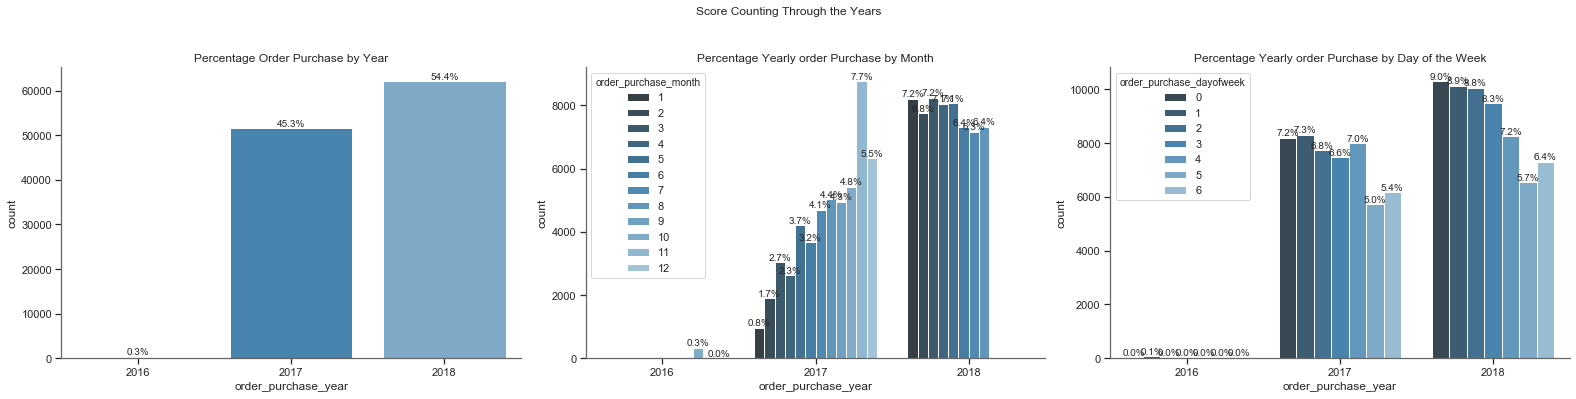

In [17]:
# Creating new datasets for each year
df_2016 = df.query('order_purchase_year=="2016"')
df_2017 = df.query('order_purchase_year=="2017"')
df_2018 = df.query('order_purchase_year=="2018"')

#displaying total orders in years, comparitive year on month, and month on days of the week
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
count_plot(feature='order_purchase_year', df=df, ax=axs[0], title='Percentage Order Purchase by Year')
count_plot(feature='order_purchase_year', df=df, ax=axs[1], hue='order_purchase_month', title='Percentage Yearly order Purchase by Month')
count_plot(feature='order_purchase_year', df=df, ax=axs[2], hue='order_purchase_dayofweek', title='Percentage Yearly order Purchase by Day of the Week')
#format_spines(ax, right_border=False)
plt.suptitle('Score Counting Through the Years', y=1.1)
plt.show()

From the Dataset provided, Majority of the orders captured were from 2016 which amounted to 0.3% of the order, this is majorly because the dataset contains just orders for November and December for that year 

The orders for the year 2017 was captured for January till December, it accounted for 47% of the entre orders and from the second plot, there is an upward trend indicating growth in the number of orders coming in monthly, on the month of November 2017 there is a mojor spike in the number of orders and this can be attributed to the popular Black Friday Campaign.

The year 2018, although capturing orders from January till August, it accounts for 54.4% of the entire orders, from the second plot there is a slightly consistent amount of orders coming in monthly indicating sustained growth, at this point the number of orders coming in monthly almost equates that of the spike in the Black Friday campaign of the previous month.

The third plot indicates the amount of orders that came in daily during the almost 3 year period, because 2016 covered just 2 months data the visualisations are not obvious, but in the year 2017 we saw majority of the orders coming in from monday to friday and less orders during the weekend. The difference in the level of the 2017 and 2018 bars indicates an increase in the average amount of orders recieved in the later year.

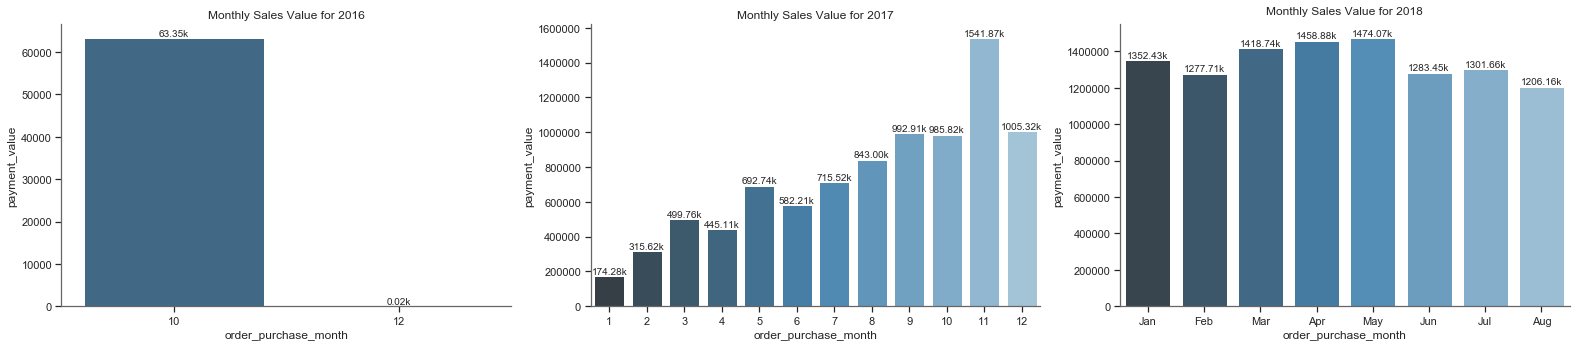

In [18]:
# Grouping by annual and monthly sales
df_ytsales = df.groupby(['order_purchase_year', 'order_purchase_month'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_month', 'payment_value']]
df_ytsales2 = df.groupby(['order_purchase_year', 'order_purchase_dayofweek'], as_index=False).mean().loc[:, ['order_purchase_year', 'order_purchase_dayofweek', 'payment_value']]
df_ytsales3 = df.groupby(['order_purchase_year', 'order_purchase_dayofweek'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_dayofweek', 'payment_value']]

df_s2016 = df_ytsales[df_ytsales['order_purchase_year']==2016]
df_s2017 = df_ytsales[df_ytsales['order_purchase_year']==2017]
df_s2018 = df_ytsales[df_ytsales['order_purchase_year']==2018]

fig, axs = plt.subplots(1, 3, figsize=(22, 5))
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2018, ax=axs[2], value=True)
axs[0].set_title('Monthly Sales Value for 2016')
axs[1].set_title('Monthly Sales Value for 2017')
axs[2].set_title('Monthly Sales Value for 2018', pad=10)
plt.xticks(np.arange(8), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
plt.show()

The above plot visualizes similar details as in the prior but this time it accounts for the monetary value of the orders that came in during the months of 2016, 2017 and 2018.

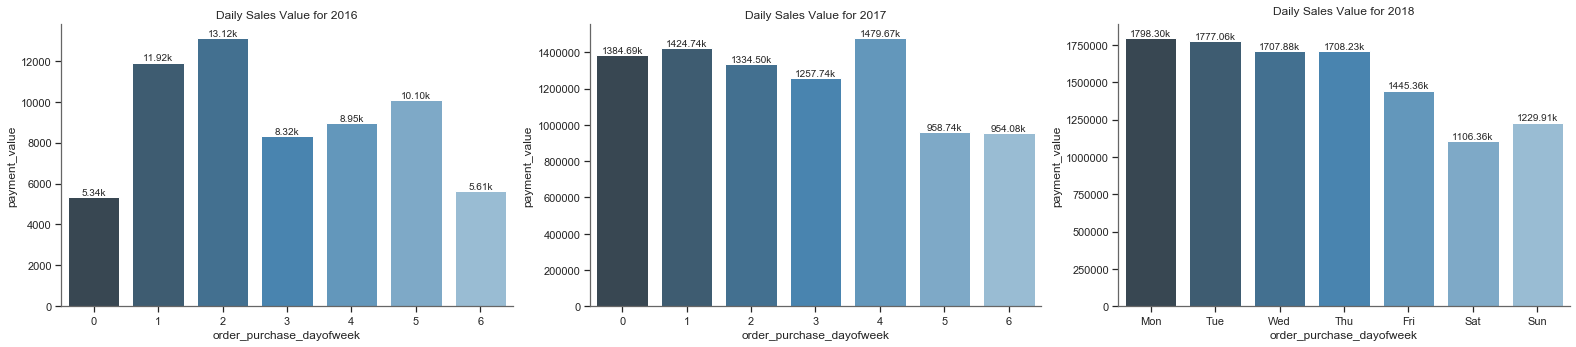

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
bar_plot(x='order_purchase_dayofweek', y='payment_value', df=df_ytsales3[df_ytsales3['order_purchase_year']==2016], ax=axs[0], value=True)
bar_plot(x='order_purchase_dayofweek', y='payment_value', df=df_ytsales3[df_ytsales3['order_purchase_year']==2017], ax=axs[1], value=True)
bar_plot(x='order_purchase_dayofweek', y='payment_value', df=df_ytsales3[df_ytsales3['order_purchase_year']==2018], ax=axs[2], value=True)
axs[0].set_title('Daily Sales Value for 2016')
axs[1].set_title('Daily Sales Value for 2017')
axs[2].set_title('Daily Sales Value for 2018', pad=10)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

The above plot visualizes similar details as in the prior but this time it accounts for the monetary value of the orders that came in during the days of the week for year 2016, 2017 and 2018.

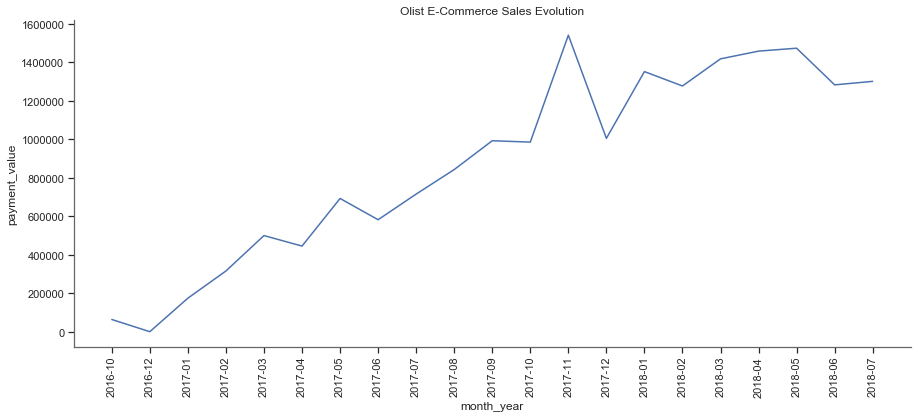

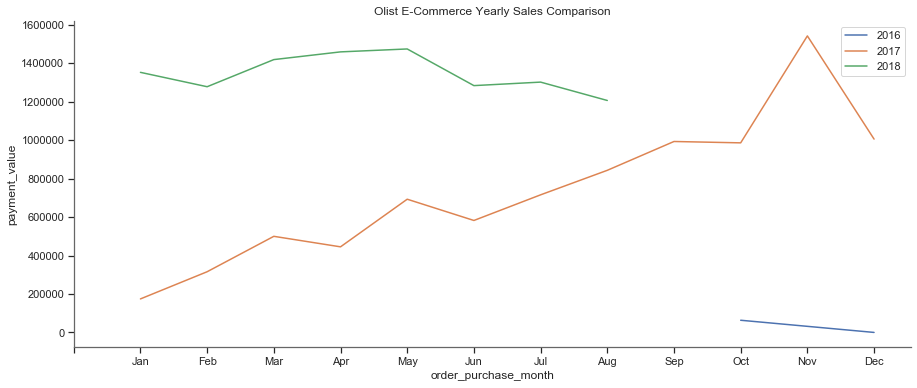

In [20]:
# Changing the month attribute for correct ordenation
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

# Creating new year-month column
df_ytsales['month_year'] = df_ytsales['order_purchase_year'].astype(str) + '-' + df_ytsales['order_purchase_month'].astype(str)
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(int)

# PLotting
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.lineplot(x='month_year', y='payment_value', data=df_ytsales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Olist E-Commerce Sales Evolution')
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2016, label='2016')
ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2018, label='2018')
format_spines(ax, right_border=False)
ax.set_title('Olist E-Commerce Yearly Sales Comparison')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

The first plot shows the time series evolution and growth of sales in Olist from October 2016 through to July 2018. There has been an upward trend in sales value with a peak in november 2017 possibly from the popular Black Friday event.

The second plot shows the comparitive line charts for each year.

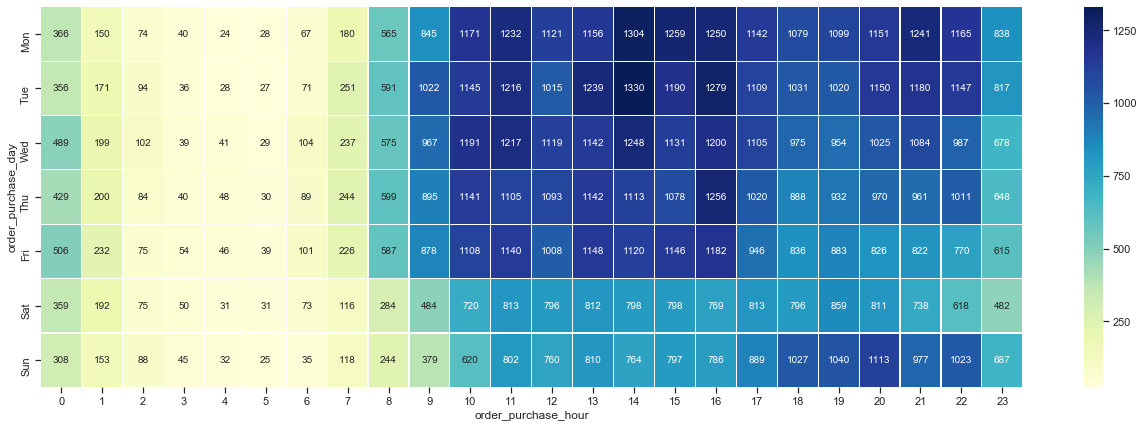

In [21]:
#customer daily order purchase behaviour
purchase_count = df.groupby(['order_purchase_day', 'order_purchase_hour']).count()['price'].unstack()
plt.figure(figsize=(22,7))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap="YlGnBu", annot=True, fmt="d", linewidths=0.2)
plt.show()

The above heatmap shows the sum of hourly period order count, each day of the week. This plot shares insight on customer hourly purchase behaviour, as displayed above very few orders come in at the early hours of the day(0 to 5am), on the weekdays normal activicties starts somewhere around 6am and the order counts heats up hiting peaks somewhere around 11 am to 5pm, and even if the order counts drops a bit by the evening on Fridays and Saturdays, nornal activicties continues for other days especially Sundays, Mondays and Tuesdays

# Payment Analysis

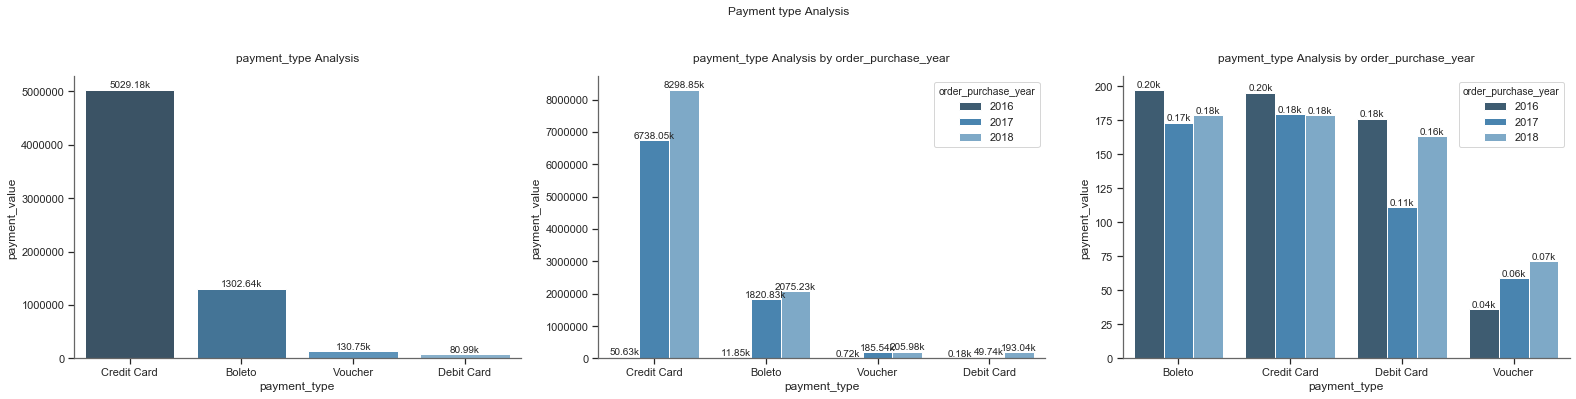

In [22]:
df_ypt = df.groupby(['order_purchase_year', 'payment_type'], as_index=False).sum().loc[:, ['order_purchase_year', 'payment_type', 'payment_value']]
df_dpt = df.groupby(['order_purchase_year', 'payment_type'], as_index=False).mean().loc[:, ['order_purchase_year', 'payment_type', 'payment_value']]

#displaying total orders in years, comparitive year on month, and month on days of the week
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
bar_plot(x='payment_type', y='payment_value', ax=axs[0], df=df_ypt.sort_values(by='payment_value', ascending=False), value=True)
bar_plot(x='payment_type', y='payment_value', ax=axs[1], hue='order_purchase_year', df=df_ypt.sort_values(by='payment_value', ascending=False), value=True)
bar_plot(x='payment_type', y='payment_value', ax=axs[2], hue='order_purchase_year', df=df_dpt.sort_values(by='payment_value', ascending=False), value=True)

format_spines(ax, right_border=False)
plt.suptitle('Payment type Analysis', y=1.1)
plt.show()

The first plot above visualizes the customer transaction payment option ranging from Credit Cards which is the most used(5029.18k) to Boleto(1302.4k), Voucher(130.75k) and Debit Card(80.99k)
Plot 2 further shows the payment option usage over each individual year.
Plot 3 displays the average amount used on each payment type

In [23]:
# grouping df
df_ypp = df.groupby(['order_purchase_year','order_purchase_month', 'payment_type'], as_index=False).count().loc[:, ['order_purchase_year', 'order_purchase_month', 'payment_type', 'payment_value']]
# Creating new column year-month
df_ypp['month_year'] = df_ypp['order_purchase_year'].astype(str) + '-' + df_ypp['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
#filtering out year 2016
df_ypp = df_ypp.query("month_year != '2016-12' and month_year != '2016-10'")

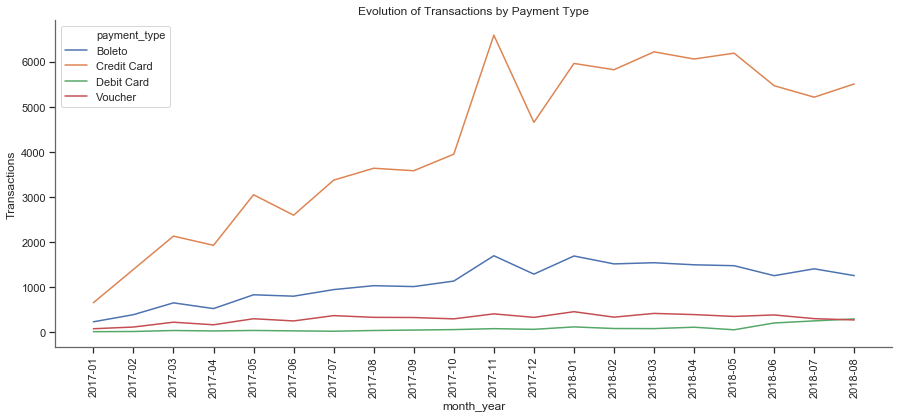

In [24]:
# PLotting
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='month_year', y='payment_value', data=df_ypp, hue='payment_type')
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Transactions')
ax.set_title('Evolution of Transactions by Payment Type')
plt.show()

The above plot displays the trend in the use of each payment type over time, as visualized in the plot Credit card gained the most number of usage over time, next in line was Boleto which maintained a little increase in usage over time. Voucher and Debit Cards remained the least used payment type and had very little usage over time

In [25]:
# displaying yearly Total sum of individual paymment type
df_ypt

,order_purchase_year,payment_type,payment_value
0,2016,Boleto,11850.00
1,2016,Credit Card,50629.55
2,2016,Debit Card,176.23
3,2016,Voucher,718.53
4,2017,Boleto,1820831.38
5,2017,Credit Card,6738051.05
6,2017,Debit Card,49740.42
7,2017,Voucher,185541.87
8,2018,Boleto,2075225.04
9,2018,Credit Card,8298853.02


In [26]:
# displaying yearly average amount of individual paymment type
df_dpt

,order_purchase_year,payment_type,payment_value
0,2016,Boleto,197.500000
1,2016,Credit Card,195.480888
2,2016,Debit Card,176.230000
3,2016,Voucher,35.926500
4,2017,Boleto,173.296981
5,2017,Credit Card,179.676570
6,2017,Debit Card,111.027723
7,2017,Voucher,58.715782
8,2018,Boleto,178.667675
9,2018,Credit Card,178.808347


# Logistics and Customer Rating Analysis

In [27]:
# Working days between purchase time and actual delivery time
df_actual_delivery = add_series_working_days(series_name='actual_delivery_working_days', df=df, date_col1 = 'order_purchase_timestamp', date_col2 = 'order_delivered_customer_date')
df_actual_delivery = df_actual_delivery.groupby(['customer_state'], as_index=False).mean().loc[:, ['customer_state', 'payment_value', 'freight_value','review_score', 'actual_delivery_working_days']]

# Working days between estimated delivery time and actual delivery time
df_estimated_delivery = add_series_working_days(series_name='estimated_delivery_working_days',df=df, date_col1 = 'order_delivered_customer_date', date_col2 = 'order_estimated_delivery_date')
df_estimated_delivery = df_estimated_delivery.groupby(['customer_state'], as_index=False).mean().loc[:, ['customer_state', 'payment_value', 'freight_value','review_score', 'estimated_delivery_working_days']]
 
# logistic metrics mean
mean_frieght = df_actual_delivery['freight_value'].mean()
df_mean_actual_delivery = df_actual_delivery['actual_delivery_working_days'].mean()
df_mean_estimated_delivery = df_estimated_delivery['estimated_delivery_working_days'].mean()

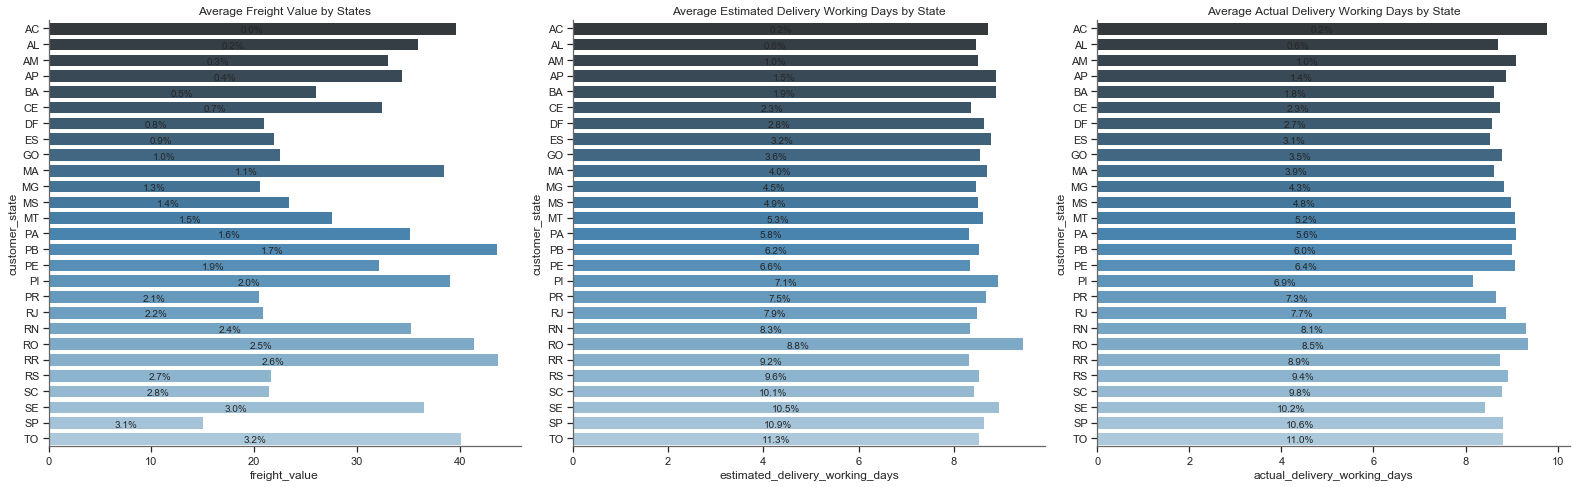

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(22, 7))
bar_plot(x='actual_delivery_working_days', y='customer_state', df=df_actual_delivery, ax=axs[2])
bar_plot(x='estimated_delivery_working_days', y='customer_state', df=df_estimated_delivery, ax=axs[1])
bar_plot(x='freight_value', y='customer_state', df=df_estimated_delivery, ax=axs[0])
format_spines(ax, right_border=False)
axs[0].set_title('Average Freight Value by States')
axs[1].set_title('Average Estimated Delivery Working Days by State')
axs[2].set_title('Average Actual Delivery Working Days by State')
plt.show()

Plot 1 shows the average frieght value for the various states
Plot 2 shows the average expected delivery time (in working days) of the various states
Plot 3 shows the actual delivery time (in working days) of the various states

The first state AC has an average freight value of $38, average estimated delivery time of 9 days and actual delivery time of 10 days, indicating that on an average delivery to this part of the country comes 1 days later than expected.

# Customer analysis

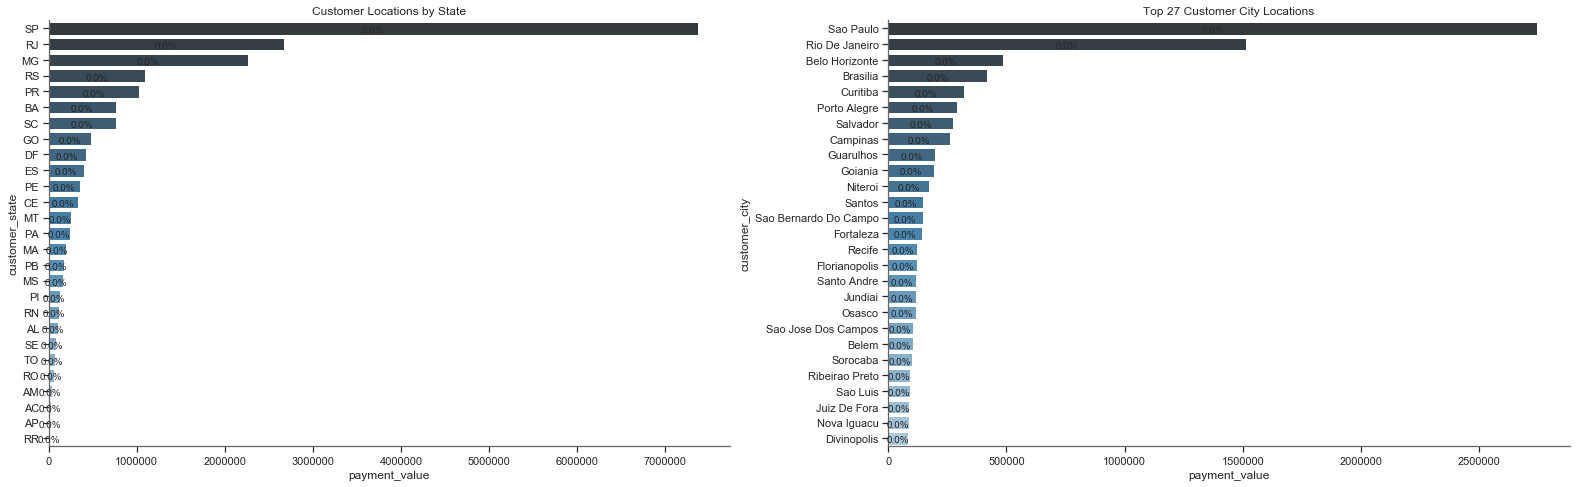

In [29]:
# Grouping by customer state
df_cus_st = df.groupby(['customer_state'], as_index=False).sum().loc[:, ['customer_state', 'payment_value']].sort_values(by='payment_value', ascending=False)
df_cus_ct = df.groupby(['customer_city'], as_index=False).sum().loc[:, ['customer_city', 'payment_value']].sort_values(by='payment_value', ascending=False).head(27)

fig, axs = plt.subplots(1, 2, figsize=(22, 7))
bar_plot(x='payment_value', y='customer_state', df=df_cus_st, ax=axs[0], value=False)
bar_plot(x='payment_value', y='customer_city', df=df_cus_ct, ax=axs[1], value=False)
format_spines(ax, right_border=False)
axs[0].set_title('Customer Locations by State')
axs[1].set_title('Top 27 Customer City Locations')

plt.show()

The above plots shows the customer locations by Stata and City, it SP, RG, MG, RS, and PR are the top 5 states with the most customers while Sao Paulo, Rio de jenerio, Belo Horizonte, Brasilia and Curtiba are the top 5 cities

In [30]:
df_cus_ct.sort_values(by='payment_value', ascending=False)

,customer_city,payment_value
3554,Sao Paulo,2744140.08
3118,Rio De Janeiro,1512264.16
448,Belo Horizonte,485497.45
552,Brasilia,419446.49
1133,Curitiba,321718.71
2928,Porto Alegre,290846.73
3210,Salvador,275702.25
699,Campinas,260225.66
1515,Guarulhos,197740.46
1431,Goiania,192300.41


The table above displays the total amount of purchases each of the top 27 cities have brought in sorted in decsending order

In [31]:
df_cus_st.head(20).sort_values(by='payment_value', ascending=False)

,customer_state,payment_value
25,SP,7364428.86
18,RJ,2668276.40
10,MG,2265709.61
22,RS,1096430.69
17,PR,1025333.56
4,BA,764968.01
23,SC,760846.05
8,GO,487072.49
6,DF,421536.70
7,ES,397330.29


The table above displays the total amount of purchases each of the States have brought in sorted in decsending order

In [32]:
customer_value_sum = (df.groupby(['customer_unique_id'])[['payment_value', 'payment_installments','review_score']]
.agg({'payment_value':['count', 'mean', 'sum'], 'payment_installments': ['mean'], 'review_score': ['mean']})
                ).sort_values(by=('payment_value','sum'), ascending=False)

customer_value_sum.head(20)

payment_value                           \
                                         count          mean        sum   
customer_unique_id                                                        
0a0a92112bd4c708ca5fde585afaa872             8  13664.080000  109312.64   
698e1cf81d01a3d389d96145f7fa6df8            20   2262.800000   45256.00   
c402f431464c72e27330a67f7b94d4fb            20   2202.400000   44048.00   
4007669dec559734d6f53e029e360987             6   6081.540000   36489.24   
ef8d54b3797ea4db1d63f0ced6a906e9            10   3018.600000   30186.00   
763c8b1c9c68a0229c42c9fc6f662b93             4   7274.880000   29099.52   
c8460e4251689ba205045f3ea17884a1            24   1163.977500   27935.46   
eae0a83d752b1dd32697e0e7b4221656            15   1670.126000   25051.89   
3d47f4368ccc8e1bb4c4a12dbda7111b            10   2234.660000   22346.60   
adfa1cab2b2c8706db21bb13c0a1beb1             6   3242.840000   19457.04   
0f5ac8d5c31de21d2f25e24be15bbffb            18   1074.570000   19342.26   
1b76903617af13189607a36b0469f6f3             6   3195.730000   19174.38   
d97b3cfb22b0d6b25ac9ed4e9c2d481b            24    798.635833   19167.26   
9eca552063680b7cd2ed0e8aea002b21            12   1482.240000   17786.88   
20a5257c01689ac69410a14cb51bb447            10   1767.100000   17671.00   
fff5eb4918b2bf4b2da476788d42051c             6   2844.960000   17069.76   
6d394722d5fc5e721aee6875a218d8db             8   2039.200000   16313.60   
37bc3d463e2a0024012a7fa587597a3c            12   1246.970000   14963.64   
6411590d91c48640cb07e72fbb4a359e             9   1619.730000   14577.57   
38a4f1deb45ca914dd13c73b41775d71            10   1440.100000   14401.00   

                                 payment_installments review_score  
                                                 mean         mean  
customer_unique_id                                                  
0a0a92112bd4c708ca5fde585afaa872             1.000000          1.0  
698e1cf81d01a3d389d96145f7fa6df8             4.000000          1.0  
c402f431464c72e27330a67f7b94d4fb             1.000000          1.0  
4007669dec559734d6f53e029e360987             1.000000          1.0  
ef8d54b3797ea4db1d63f0ced6a906e9             1.000000          5.0  
763c8b1c9c68a0229c42c9fc6f662b93             1.000000          1.0  
c8460e4251689ba205045f3ea17884a1             6.000000          4.0  
eae0a83d752b1dd32697e0e7b4221656             8.933333          3.0  
3d47f4368ccc8e1bb4c4a12dbda7111b            10.000000          1.0  
adfa1cab2b2c8706db21bb13c0a1beb1            10.000000          3.0  
0f5ac8d5c31de21d2f25e24be15bbffb             8.500000          5.0  
1b76903617af13189607a36b0469f6f3             1.000000          1.0  
d97b3cfb22b0d6b25ac9ed4e9c2d481b             3.000000          1.0  
9eca552063680b7cd2ed0e8aea002b21             1.000000          1.0  
20a5257c01689ac69410a14cb51bb447             1.000000          1.0  
fff5eb4918b2bf4b2da476788d42051c             1.000000          5.0  
6d394722d5fc5e721aee6875a218d8db             1.000000          4.0  
37bc3d463e2a0024012a7fa587597a3c             1.000000          4.0  
6411590d91c48640cb07e72fbb4a359e            10.000000          1.0  
38a4f1deb45ca914dd13c73b41775d71            24.000000          1.0

The above table displays the top 20 customers, number of purchases, mean average amount spent on transactions, the total value of purchases, average number of payments installment and mean level of satisfaction